In [127]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import collections

from tensor2tensor import models
from tensor2tensor import problems
from tensor2tensor.layers import common_layers
from tensor2tensor.utils import trainer_lib
from tensor2tensor.utils import t2t_model
from tensor2tensor.utils import registry
from tensor2tensor.utils import metrics

import sys
sys.path.append("../tfti")
import tfti

sys.path.append("../decode")
import decode

# for metrics
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

import scipy

In [128]:

# to get the latest checkpoint in a directory: `tf.train.latest_checkpoint("path/to/ckpt_dir")`
# otherwise, specify the checkpoint file explicitly


#### CURRENT
#ckpt_path = ("/data/akmorrow/tfti/t2t_train/6-24-25/"
#             "model.ckpt-210001")

# problem_name = "genomics_binding_deepsea_gm12878"
# model_name   = "tfti_transformer"
# hparams_set  = "tfti_transformer_base"

# Getting Required Files for Validation


In [129]:
# TODO: user configures
tmp_dir = "/data/epitome/tmp/"
validation_file = os.path.join(tmp_dir, "deepsea_train/valid.mat")

if not os.path.isfile(validation_file):
     raise ValueError("%s cannot be found." % validation_file)
       

In [ ]:
reload(decode)
# dev_cell_type_1 should be the cell type that you are evaluating against.
dev_cell_type_1 = 'GM12878'
dev_cell_type_2 = 'H1-hESC'

# define which marks you would like to keep in the mask
validation_marks = []
decoder = decode.Decode(ckpt_path, hparams_overrides_str=hparams_overrides_str)
predictions_numpy, labels_numpy = decoder.infer(validation_file, validation_marks, dev_cell_type_1, dev_cell_type_2)

INFO:tensorflow:Overriding hparams in tfti_transformer_base with batch_size=32,num_encoder_layers=6,num_decoder_layers=6,learning_rate_constant=0.2,latent_keep_prob=0.50,pos_weight=25


[2018-04-30 16:16:03,792] Overriding hparams in tfti_transformer_base with batch_size=32,num_encoder_layers=6,num_decoder_layers=6,learning_rate_constant=0.2,latent_keep_prob=0.50,pos_weight=25


INFO:tensorflow:Unsetting shared_embedding_and_softmax_weights.


[2018-04-30 16:16:03,796] Unsetting shared_embedding_and_softmax_weights.


INFO:tensorflow:Setting T2TModel mode to 'infer'


[2018-04-30 16:16:03,798] Setting T2TModel mode to 'infer'


INFO:tensorflow:Setting hparams.dropout to 0.0


[2018-04-30 16:16:03,800] Setting hparams.dropout to 0.0


INFO:tensorflow:Setting hparams.layer_prepostprocess_dropout to 0.0


[2018-04-30 16:16:03,802] Setting hparams.layer_prepostprocess_dropout to 0.0


INFO:tensorflow:Setting hparams.symbol_dropout to 0.0


[2018-04-30 16:16:03,804] Setting hparams.symbol_dropout to 0.0


INFO:tensorflow:Setting hparams.attention_dropout to 0.0


[2018-04-30 16:16:03,805] Setting hparams.attention_dropout to 0.0


INFO:tensorflow:Setting hparams.relu_dropout to 0.0


[2018-04-30 16:16:03,806] Setting hparams.relu_dropout to 0.0


INFO:tensorflow:Marks for CellType GM12878: [(204, 'GM12878|ATF2|None'), (205, 'GM12878|ATF3|None'), (207, 'GM12878|BCL11A|None'), (410, 'GM12878|BRCA1|None'), (210, 'GM12878|CEBPB|None'), (412, 'GM12878|CHD1|None'), (413, 'GM12878|CHD2|None'), (127, 'GM12878|CTCF|None'), (53, 'GM12878|DNase|None'), (128, 'GM12878|EZH2|None'), (212, 'GM12878|Egr-1|None'), (216, 'GM12878|GABP|None'), (420, 'GM12878|JunD|None'), (421, 'GM12878|Max|None'), (423, 'GM12878|Mxi1|None'), (223, 'GM12878|NRSF|None'), (428, 'GM12878|Nrf1|None'), (229, 'GM12878|Pol2-4H8|None'), (230, 'GM12878|Pol2|None'), (436, 'GM12878|RFX5|None'), (235, 'GM12878|RXRA|None'), (233, 'GM12878|Rad21|None'), (437, 'GM12878|SIN3A|None'), (236, 'GM12878|SIX5|None'), (237, 'GM12878|SP1|None'), (238, 'GM12878|SRF|None'), (240, 'GM12878|TAF1|None'), (442, 'GM12878|TBP|None'), (241, 'GM12878|TCF12|None'), (243, 'GM12878|USF-1|None'), (444, 'GM12878|USF2|None'), (244, 'GM12878|YY1|None'), (447, 'GM12878|Znf143|None'), (725, 'GM12878|c-Myc|

[2018-04-30 16:16:03,826] Marks for CellType GM12878: [(204, 'GM12878|ATF2|None'), (205, 'GM12878|ATF3|None'), (207, 'GM12878|BCL11A|None'), (410, 'GM12878|BRCA1|None'), (210, 'GM12878|CEBPB|None'), (412, 'GM12878|CHD1|None'), (413, 'GM12878|CHD2|None'), (127, 'GM12878|CTCF|None'), (53, 'GM12878|DNase|None'), (128, 'GM12878|EZH2|None'), (212, 'GM12878|Egr-1|None'), (216, 'GM12878|GABP|None'), (420, 'GM12878|JunD|None'), (421, 'GM12878|Max|None'), (423, 'GM12878|Mxi1|None'), (223, 'GM12878|NRSF|None'), (428, 'GM12878|Nrf1|None'), (229, 'GM12878|Pol2-4H8|None'), (230, 'GM12878|Pol2|None'), (436, 'GM12878|RFX5|None'), (235, 'GM12878|RXRA|None'), (233, 'GM12878|Rad21|None'), (437, 'GM12878|SIN3A|None'), (236, 'GM12878|SIX5|None'), (237, 'GM12878|SP1|None'), (238, 'GM12878|SRF|None'), (240, 'GM12878|TAF1|None'), (442, 'GM12878|TBP|None'), (241, 'GM12878|TCF12|None'), (243, 'GM12878|USF-1|None'), (444, 'GM12878|USF2|None'), (244, 'GM12878|YY1|None'), (447, 'GM12878|Znf143|None'), (725, 'GM12

INFO:tensorflow:Marks for CellType GM12878: [(204, 'GM12878|ATF2|None'), (205, 'GM12878|ATF3|None'), (207, 'GM12878|BCL11A|None'), (410, 'GM12878|BRCA1|None'), (210, 'GM12878|CEBPB|None'), (412, 'GM12878|CHD1|None'), (413, 'GM12878|CHD2|None'), (127, 'GM12878|CTCF|None'), (53, 'GM12878|DNase|None'), (128, 'GM12878|EZH2|None'), (212, 'GM12878|Egr-1|None'), (216, 'GM12878|GABP|None'), (420, 'GM12878|JunD|None'), (421, 'GM12878|Max|None'), (423, 'GM12878|Mxi1|None'), (223, 'GM12878|NRSF|None'), (428, 'GM12878|Nrf1|None'), (229, 'GM12878|Pol2-4H8|None'), (230, 'GM12878|Pol2|None'), (436, 'GM12878|RFX5|None'), (235, 'GM12878|RXRA|None'), (233, 'GM12878|Rad21|None'), (437, 'GM12878|SIN3A|None'), (236, 'GM12878|SIX5|None'), (237, 'GM12878|SP1|None'), (238, 'GM12878|SRF|None'), (240, 'GM12878|TAF1|None'), (442, 'GM12878|TBP|None'), (241, 'GM12878|TCF12|None'), (243, 'GM12878|USF-1|None'), (444, 'GM12878|USF2|None'), (244, 'GM12878|YY1|None'), (447, 'GM12878|Znf143|None'), (725, 'GM12878|c-Myc|

[2018-04-30 16:16:03,845] Marks for CellType GM12878: [(204, 'GM12878|ATF2|None'), (205, 'GM12878|ATF3|None'), (207, 'GM12878|BCL11A|None'), (410, 'GM12878|BRCA1|None'), (210, 'GM12878|CEBPB|None'), (412, 'GM12878|CHD1|None'), (413, 'GM12878|CHD2|None'), (127, 'GM12878|CTCF|None'), (53, 'GM12878|DNase|None'), (128, 'GM12878|EZH2|None'), (212, 'GM12878|Egr-1|None'), (216, 'GM12878|GABP|None'), (420, 'GM12878|JunD|None'), (421, 'GM12878|Max|None'), (423, 'GM12878|Mxi1|None'), (223, 'GM12878|NRSF|None'), (428, 'GM12878|Nrf1|None'), (229, 'GM12878|Pol2-4H8|None'), (230, 'GM12878|Pol2|None'), (436, 'GM12878|RFX5|None'), (235, 'GM12878|RXRA|None'), (233, 'GM12878|Rad21|None'), (437, 'GM12878|SIN3A|None'), (236, 'GM12878|SIX5|None'), (237, 'GM12878|SP1|None'), (238, 'GM12878|SRF|None'), (240, 'GM12878|TAF1|None'), (442, 'GM12878|TBP|None'), (241, 'GM12878|TCF12|None'), (243, 'GM12878|USF-1|None'), (444, 'GM12878|USF2|None'), (244, 'GM12878|YY1|None'), (447, 'GM12878|Znf143|None'), (725, 'GM12

INFO:tensorflow:Marks for CellType GM12878: [(204, 'GM12878|ATF2|None'), (205, 'GM12878|ATF3|None'), (207, 'GM12878|BCL11A|None'), (410, 'GM12878|BRCA1|None'), (210, 'GM12878|CEBPB|None'), (412, 'GM12878|CHD1|None'), (413, 'GM12878|CHD2|None'), (127, 'GM12878|CTCF|None'), (53, 'GM12878|DNase|None'), (128, 'GM12878|EZH2|None'), (212, 'GM12878|Egr-1|None'), (216, 'GM12878|GABP|None'), (420, 'GM12878|JunD|None'), (421, 'GM12878|Max|None'), (423, 'GM12878|Mxi1|None'), (223, 'GM12878|NRSF|None'), (428, 'GM12878|Nrf1|None'), (229, 'GM12878|Pol2-4H8|None'), (230, 'GM12878|Pol2|None'), (436, 'GM12878|RFX5|None'), (235, 'GM12878|RXRA|None'), (233, 'GM12878|Rad21|None'), (437, 'GM12878|SIN3A|None'), (236, 'GM12878|SIX5|None'), (237, 'GM12878|SP1|None'), (238, 'GM12878|SRF|None'), (240, 'GM12878|TAF1|None'), (442, 'GM12878|TBP|None'), (241, 'GM12878|TCF12|None'), (243, 'GM12878|USF-1|None'), (444, 'GM12878|USF2|None'), (244, 'GM12878|YY1|None'), (447, 'GM12878|Znf143|None'), (725, 'GM12878|c-Myc|

[2018-04-30 16:16:03,863] Marks for CellType GM12878: [(204, 'GM12878|ATF2|None'), (205, 'GM12878|ATF3|None'), (207, 'GM12878|BCL11A|None'), (410, 'GM12878|BRCA1|None'), (210, 'GM12878|CEBPB|None'), (412, 'GM12878|CHD1|None'), (413, 'GM12878|CHD2|None'), (127, 'GM12878|CTCF|None'), (53, 'GM12878|DNase|None'), (128, 'GM12878|EZH2|None'), (212, 'GM12878|Egr-1|None'), (216, 'GM12878|GABP|None'), (420, 'GM12878|JunD|None'), (421, 'GM12878|Max|None'), (423, 'GM12878|Mxi1|None'), (223, 'GM12878|NRSF|None'), (428, 'GM12878|Nrf1|None'), (229, 'GM12878|Pol2-4H8|None'), (230, 'GM12878|Pol2|None'), (436, 'GM12878|RFX5|None'), (235, 'GM12878|RXRA|None'), (233, 'GM12878|Rad21|None'), (437, 'GM12878|SIN3A|None'), (236, 'GM12878|SIX5|None'), (237, 'GM12878|SP1|None'), (238, 'GM12878|SRF|None'), (240, 'GM12878|TAF1|None'), (442, 'GM12878|TBP|None'), (241, 'GM12878|TCF12|None'), (243, 'GM12878|USF-1|None'), (444, 'GM12878|USF2|None'), (244, 'GM12878|YY1|None'), (447, 'GM12878|Znf143|None'), (725, 'GM12

INFO:tensorflow:Transforming feature 'inputs' with symbol_modality_782_512.bottom


[2018-04-30 16:16:03,900] Transforming feature 'inputs' with symbol_modality_782_512.bottom


INFO:tensorflow:Transforming feature 'latents' with binary_imputation_class_label_modality_512.bottom


[2018-04-30 16:16:04,021] Transforming feature 'latents' with binary_imputation_class_label_modality_512.bottom


INFO:tensorflow:Transforming 'targets' with binary_class_label_modality_512.targets_bottom


[2018-04-30 16:16:04,058] Transforming 'targets' with binary_class_label_modality_512.targets_bottom


INFO:tensorflow:Building model body


[2018-04-30 16:16:04,084] Building model body


INFO:tensorflow:Transforming body output with binary_class_label_modality_512.top


[2018-04-30 16:16:09,708] Transforming body output with binary_class_label_modality_512.top


INFO:tensorflow:Restoring parameters from /data/akmorrow/tfti/t2t_train/6-24-25/model.ckpt-210001


[2018-04-30 16:16:11,113] Restoring parameters from /data/akmorrow/tfti/t2t_train/6-24-25/model.ckpt-210001


Computed predictions for : 0 points...


In [152]:
tfs = decoder.get_tfs(dev_cell_type_1,dev_cell_type_2)

INFO:tensorflow:Marks for CellType GM12878: [(204, 'GM12878|ATF2|None'), (205, 'GM12878|ATF3|None'), (207, 'GM12878|BCL11A|None'), (410, 'GM12878|BRCA1|None'), (210, 'GM12878|CEBPB|None'), (412, 'GM12878|CHD1|None'), (413, 'GM12878|CHD2|None'), (127, 'GM12878|CTCF|None'), (53, 'GM12878|DNase|None'), (128, 'GM12878|EZH2|None'), (212, 'GM12878|Egr-1|None'), (216, 'GM12878|GABP|None'), (420, 'GM12878|JunD|None'), (421, 'GM12878|Max|None'), (423, 'GM12878|Mxi1|None'), (223, 'GM12878|NRSF|None'), (428, 'GM12878|Nrf1|None'), (229, 'GM12878|Pol2-4H8|None'), (230, 'GM12878|Pol2|None'), (436, 'GM12878|RFX5|None'), (235, 'GM12878|RXRA|None'), (233, 'GM12878|Rad21|None'), (437, 'GM12878|SIN3A|None'), (236, 'GM12878|SIX5|None'), (237, 'GM12878|SP1|None'), (238, 'GM12878|SRF|None'), (240, 'GM12878|TAF1|None'), (442, 'GM12878|TBP|None'), (241, 'GM12878|TCF12|None'), (243, 'GM12878|USF-1|None'), (444, 'GM12878|USF2|None'), (244, 'GM12878|YY1|None'), (447, 'GM12878|Znf143|None'), (725, 'GM12878|c-Myc|

[2018-04-30 15:08:57,600] Marks for CellType GM12878: [(204, 'GM12878|ATF2|None'), (205, 'GM12878|ATF3|None'), (207, 'GM12878|BCL11A|None'), (410, 'GM12878|BRCA1|None'), (210, 'GM12878|CEBPB|None'), (412, 'GM12878|CHD1|None'), (413, 'GM12878|CHD2|None'), (127, 'GM12878|CTCF|None'), (53, 'GM12878|DNase|None'), (128, 'GM12878|EZH2|None'), (212, 'GM12878|Egr-1|None'), (216, 'GM12878|GABP|None'), (420, 'GM12878|JunD|None'), (421, 'GM12878|Max|None'), (423, 'GM12878|Mxi1|None'), (223, 'GM12878|NRSF|None'), (428, 'GM12878|Nrf1|None'), (229, 'GM12878|Pol2-4H8|None'), (230, 'GM12878|Pol2|None'), (436, 'GM12878|RFX5|None'), (235, 'GM12878|RXRA|None'), (233, 'GM12878|Rad21|None'), (437, 'GM12878|SIN3A|None'), (236, 'GM12878|SIX5|None'), (237, 'GM12878|SP1|None'), (238, 'GM12878|SRF|None'), (240, 'GM12878|TAF1|None'), (442, 'GM12878|TBP|None'), (241, 'GM12878|TCF12|None'), (243, 'GM12878|USF-1|None'), (444, 'GM12878|USF2|None'), (244, 'GM12878|YY1|None'), (447, 'GM12878|Znf143|None'), (725, 'GM12

In [153]:
i=0

np.set_printoptions(precision=15)

for item_ in predictions_numpy:
    var = np.var(item_)
    if (var > 0):
        print(i, var, item_.max()-item_.min())
    i += 1

7 1.1136669817627692e-15 1.1920928955078125e-07
16 1.1136669817627692e-15 1.1920928955078125e-07
36 2.784167454406923e-16 5.960464477539063e-08
52 1.1136669817627692e-15 1.1920928955078125e-07
53 1.1136669817627692e-15 1.1920928955078125e-07
61 1.1136669817627692e-15 1.1920928955078125e-07
69 1.1136669817627692e-15 1.1920928955078125e-07
77 1.1136669817627692e-15 1.1920928955078125e-07
85 1.1136669817627692e-15 1.1920928955078125e-07
90 2.784167454406923e-16 5.960464477539063e-08
101 1.1136669817627692e-15 1.1920928955078125e-07
102 1.1136669817627692e-15 1.1920928955078125e-07
108 1.1136669817627692e-15 1.1920928955078125e-07
114 1.1136669817627692e-15 1.1920928955078125e-07
115 2.784167454406923e-16 5.960464477539063e-08
157 2.784167454406923e-16 5.960464477539063e-08
165 1.1136669817627692e-15 1.1920928955078125e-07
176 1.1136669817627692e-15 1.1920928955078125e-07
177 1.1136669817627692e-15 1.1920928955078125e-07
194 1.1136669817627692e-15 1.1920928955078125e-07
197 1.1136669817627

3861 1.1136669817627692e-15 1.1920928955078125e-07
3864 1.1136669817627692e-15 1.1920928955078125e-07
3869 2.784167454406923e-16 5.960464477539063e-08
3871 1.1136669817627692e-15 1.1920928955078125e-07
3885 1.1136669817627692e-15 1.1920928955078125e-07
3887 1.1136669817627692e-15 1.1920928955078125e-07
3906 2.784167454406923e-16 5.960464477539063e-08
3910 2.784167454406923e-16 5.960464477539063e-08
3913 1.1136669817627692e-15 1.1920928955078125e-07
3918 2.784167454406923e-16 5.960464477539063e-08
3920 1.1136669817627692e-15 1.1920928955078125e-07
3932 1.1136669817627692e-15 1.1920928955078125e-07
3935 2.784167454406923e-16 5.960464477539063e-08
3944 2.784167454406923e-16 5.960464477539063e-08
3946 1.1136669817627692e-15 1.1920928955078125e-07
3948 2.784167454406923e-16 5.960464477539063e-08
3950 1.1136669817627692e-15 1.1920928955078125e-07
3954 1.1136669817627692e-15 1.1920928955078125e-07
3967 1.1136669817627692e-15 1.1920928955078125e-07
3987 1.1136669817627692e-15 1.192092895507812

7450 2.784167454406923e-16 5.960464477539063e-08
7452 1.1136669817627692e-15 1.1920928955078125e-07
7457 2.784167454406923e-16 5.960464477539063e-08
7458 2.784167454406923e-16 5.960464477539063e-08
7459 1.1136669817627692e-15 1.1920928955078125e-07
7473 2.784167454406923e-16 5.960464477539063e-08
7477 1.1136669817627692e-15 1.1920928955078125e-07
7494 2.784167454406923e-16 5.960464477539063e-08
7500 1.1136669817627692e-15 1.1920928955078125e-07
7508 2.784167454406923e-16 5.960464477539063e-08
7510 6.264376772415576e-16 8.940696716308594e-08
7524 1.1136669817627692e-15 1.1920928955078125e-07
7534 1.1136669817627692e-15 1.1920928955078125e-07
7547 2.784167454406923e-16 5.960464477539063e-08
7555 1.1136669817627692e-15 1.1920928955078125e-07
7556 2.784167454406923e-16 5.960464477539063e-08
7557 1.1136669817627692e-15 1.1920928955078125e-07
7560 2.784167454406923e-16 5.960464477539063e-08
7566 2.784167454406923e-16 5.960464477539063e-08
7569 1.1136669817627692e-15 1.1920928955078125e-07
75

In [154]:

predictions_numpy

array([[0.93507331609726 , 0.93507331609726 , 0.93507331609726 , ...,
        0.93507331609726 , 0.93507331609726 , 0.93507331609726 ],
       [0.95404589176178 , 0.95404589176178 , 0.95404589176178 , ...,
        0.95404589176178 , 0.95404589176178 , 0.95404589176178 ],
       [0.945097208023071, 0.945097208023071, 0.945097208023071, ...,
        0.945097208023071, 0.945097208023071, 0.945097208023071],
       ...,
       [0.973949313163757, 0.973949313163757, 0.973949313163757, ...,
        0.973949313163757, 0.973949313163757, 0.973949313163757],
       [0.966702580451965, 0.966702580451965, 0.966702580451965, ...,
        0.966702580451965, 0.966702580451965, 0.966702580451965],
       [0.938907206058502, 0.938907206058502, 0.938907206058502, ...,
        0.938907206058502, 0.938907206058502, 0.938907206058502]])

# ROC plots on all TFs for H1-hESC

[2018-04-30 16:13:48,795] No handles with labels found to put in legend.
/data/akmorrow/anaconda2/envs/python36/lib/python3.6/site-packages/sklearn/metrics/ranking.py:571: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


0.5922776240778002
0.5922776240778002
0.852525631407852
1.444803255485652
0.5258956416960685
1.9706988971817205
nan
0.9567371891170088
2.927436086298729
0.7090840840840841
3.636520170382813
0.8289019337016574
4.465422104084471
0.6608725300687285
5.1262946341532
0.755714659572096
5.882009293725296
0.33207228614307155
6.214081579868367
0.9626767764465282
7.176758356314895
0.9698403564347411
8.146598712749636
nan
0.9050471292380475
9.051645841987684
0.8499699359565959
9.90161577794428
0.717659128377894
10.619274906322174
0.979377209833236
11.59865211615541
0.8801328597530242
12.478784975908434
0.9645382028859296
13.443323178794364
0.5058674108260885
13.949190589620452
nan
0.7734605632169365
14.722651152837388
0.8566993710691824
15.57935052390657
0.9615089554108216
16.54085947931739
0.7909392875863169
17.331798766903706
0.7052520482272547
18.03705081513096
0.9657106750786209
19.002761490209583
0.770267322413041
19.773028812622623
0.8953428747236718
20.668371687346294
0.9446392785571143
21.

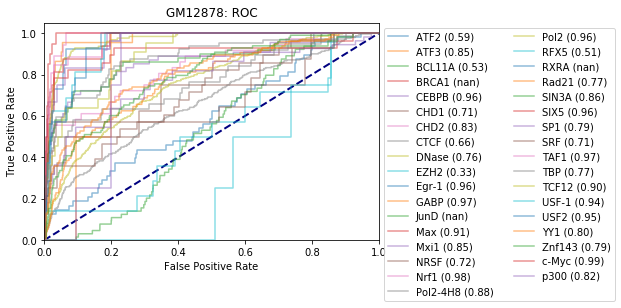

0.7418512358995095


In [164]:
plt.figure()

auc_av = 0

lw = 2
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('%s: ROC' % (dev_cell_type_1))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.legend(loc='upper left', prop={'size':6}, bbox_to_anchor=(1,1))

for i in range(len(tfs)):
    tf_ = tfs[i]
    # Compute micro-average ROC curve and ROC area
    fpr, tpr, _ = roc_curve(labels_numpy[:,i], predictions_numpy[:,i])
    roc_auc = auc(fpr, tpr)
    print(roc_auc)
    if not np.isnan(roc_auc):
        auc_av += roc_auc
        print(auc_av)

    plt.plot(fpr, tpr, label='%s (%0.2f)' % (tf_, roc_auc), alpha=0.5)

plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=2)
plt.show()

print(auc_av/len(tfs))

# Precision Recall plots on all TFs for H1-hESC

[2018-04-30 15:09:35,113] No handles with labels found to put in legend.
/data/akmorrow/anaconda2/envs/python36/lib/python3.6/site-packages/sklearn/metrics/ranking.py:444: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


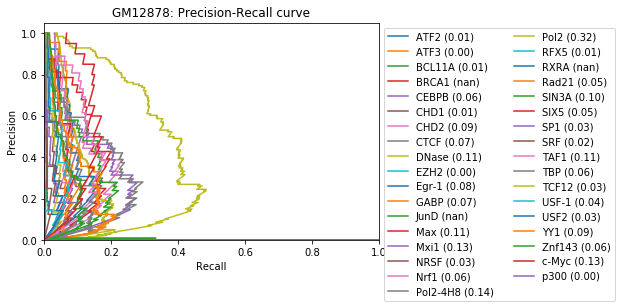

In [156]:
plt.figure()

lw = 2
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('%s: Precision-Recall curve' % (dev_cell_type_1))
plt.legend(loc='upper left', prop={'size':6}, bbox_to_anchor=(1,1))

for i in range(len(tfs)):
    tf_ = tfs[i]
    precision, recall, thresholds = precision_recall_curve(labels_numpy[:,i], predictions_numpy[:,i])
    auPRC = average_precision_score(labels_numpy[:,i], predictions_numpy[:,i])
    
    plt.plot(precision, recall, label='%s (%0.2f)' % (tf_, auPRC))

plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=2)
plt.show()

In [ ]:
tf.estimator.ModeKeys.